# K-means clustering

A01639224 | Fausto Alejandro Palma Cervantes

The notebook aims to study and implement a k-means clustering. The Iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [434]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing data

In [435]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file, store it as a pandas Data Frame and set column names
dataset = pd.read_csv(url, names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'])

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [436]:
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2. Drop rows with any missing values

In [437]:
dataset = dataset.dropna()
print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num

In [438]:
# Encoding the categorical column
dataset = dataset.replace({"Class": {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})

#Visualize the dataset
dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used

In [439]:
# Drop out non necesary columns
dataset.drop(['PetalLength', 'PetalWidth'], axis='columns', inplace=True)

#Visualize the dataset
dataset

,SepalLength,SepalWidth,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


5. Scatter plot of the data

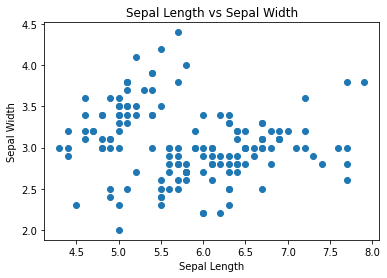

In [440]:
plt.scatter(dataset.SepalLength,dataset.SepalWidth)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

6. Scatter plot of the data asigning each point to a cluster

<ipython-input-441-5a1756ae3541>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris-setosa')
<ipython-input-441-5a1756ae3541>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris-versicolor')
<ipython-input-441-5a1756ae3541>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris-virginica')


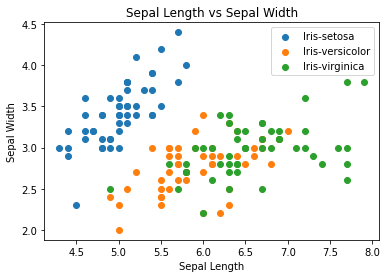

In [441]:
df0 = dataset[dataset.Class==0]
df1 = dataset[dataset.Class==1]
df2 = dataset[dataset.Class==2]

plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris-setosa')
plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris-versicolor')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris-virginica')

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [442]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
# yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['SepalLength','SepalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [443]:
# Add a new column to the dataset with the cluster information
dataset['ClusterInfo'] = yp

dataset

,SepalLength,SepalWidth,Class,ClusterInfo
0,5.1,3.5,0,2
1,4.9,3.0,0,2
2,4.7,3.2,0,2
3,4.6,3.1,0,2
4,5.0,3.6,0,2
...,...,...,...,...
145,6.7,3.0,2,1
146,6.3,2.5,2,0
147,6.5,3.0,2,1
148,6.2,3.4,2,1


In [444]:
# Array of unique cluster variables
dataset.ClusterInfo.unique()

array([2, 1, 0], dtype=int32)

In [445]:
# Final cluster center coordinates
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [446]:
# Calculates de SSE of the clusters
km.inertia_

37.0507021276596

<span style='color:Blue'> **Important remarks**  </span>
- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-447-a4fabe021ff8>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris Species 1')
<ipython-input-447-a4fabe021ff8>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Species 2')
<ipython-input-447-a4fabe021ff8>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Species 3')


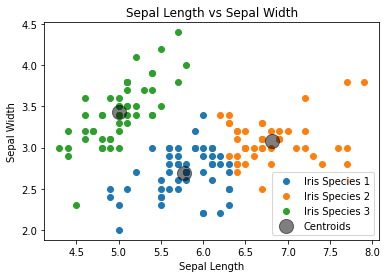

In [447]:
df0 = dataset[dataset.ClusterInfo==0]
df1 = dataset[dataset.ClusterInfo==1]
df2 = dataset[dataset.ClusterInfo==2]

plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris Species 1')
plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Species 2')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [448]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['SepalLength','SepalWidth']])
    sse.append(km.inertia_)

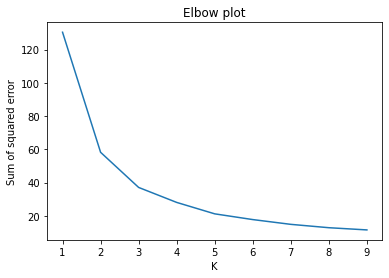

In [449]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters

# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [450]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['SepalLength']])
dataset['SepalLength'] = scaler.transform(dataset[['SepalLength']])

scaler.fit(dataset[['SepalWidth']])
dataset['SepalWidth'] = scaler.transform(dataset[['SepalWidth']])

dataset

,SepalLength,SepalWidth,Class,ClusterInfo
0,0.222222,0.625000,0,2
1,0.166667,0.416667,0,2
2,0.111111,0.500000,0,2
3,0.083333,0.458333,0,2
4,0.194444,0.666667,0,2
...,...,...,...,...
145,0.666667,0.416667,2,1
146,0.555556,0.208333,2,0
147,0.611111,0.416667,2,1
148,0.527778,0.583333,2,1


In [451]:
dataset.describe()

,SepalLength,SepalWidth,Class,ClusterInfo
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,1.000000,0.980000
std,0.230018,0.181611,0.819232,0.831187
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.000000,0.000000
50%,0.416667,0.416667,1.000000,1.000000
75%,0.583333,0.541667,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


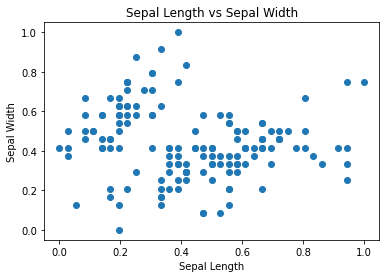

In [452]:
plt.scatter(dataset.SepalLength,dataset.SepalWidth)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [453]:
# Initialize model and define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
# yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['SepalLength','SepalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [454]:
# Add a new column to the dataset with the cluster information
dataset['NormalizedClusterInfo'] = yp

dataset

,SepalLength,SepalWidth,Class,ClusterInfo,NormalizedClusterInfo
0,0.222222,0.625000,0,2,2
1,0.166667,0.416667,0,2,2
2,0.111111,0.500000,0,2,2
3,0.083333,0.458333,0,2,2
4,0.194444,0.666667,0,2,2
...,...,...,...,...,...
145,0.666667,0.416667,2,1,1
146,0.555556,0.208333,2,0,0
147,0.611111,0.416667,2,1,1
148,0.527778,0.583333,2,1,1


<ipython-input-455-641b52ed3809>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris Species 1')
<ipython-input-455-641b52ed3809>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Species 2')
<ipython-input-455-641b52ed3809>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Species 3')


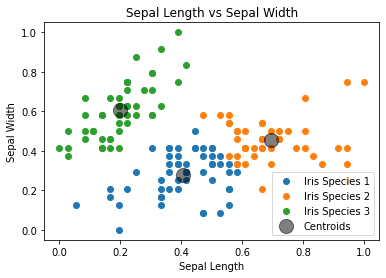

In [455]:
df0 = dataset[dataset.NormalizedClusterInfo==0]
df1 = dataset[dataset.NormalizedClusterInfo==1]
df2 = dataset[dataset.NormalizedClusterInfo==2]

plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris Species 1')
plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Species 2')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Final remarks

- The K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you)

- The number assigned to each cluster is randomly assigned based on the number of clusters (0, 1, 2)

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means